In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#Load the dataset
df = pd.read_csv('C:/Users/singh/Desktop/TIP_2/fraudTest.csv', on_bad_lines='skip')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [2]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,31-12-2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,13-02-1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,31-12-2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27-12-1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,31-12-2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29-11-1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31-12-2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15-12-1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [3]:
#Display the data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [4]:
#Sum the missing value
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:

# Drop the first column
df.drop(df.columns[0], axis=1, inplace=True)

In [6]:
#Summary the description of the dataset
df.describe()
#Sum the missing value
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Data Pre-processing

In [7]:
# Split the 'trans_date_trans_time' into 'trans_date' and 'trans_time'
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.time

# Remove the 'trans_date_trans_time' column and 'Unnamed: 0' if it exists
df.drop(columns=['trans_date_trans_time', 'Unnamed: 0'], errors='ignore', inplace=True)

# Reorder the columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
df = df[columns]

# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')

# Check the data types
print("\nData types of the columns:")
print(df.dtypes)

plt.figure(figsize=(14, 8))
# Filter for transactions where is_fraud is 1
df_fraud = df[df['is_fraud'] == 1]

# Print columns of df_fraud to check column names and existence
print(df_fraud.columns)


Data types of the columns:
trans_date            object
trans_time            object
cc_num               float64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object
Index(['trans_date', 'trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


<Figure size 1400x800 with 0 Axes>

In [8]:

df.head()

,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21,12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21,12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21,12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21,12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21,12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# EDA

In [14]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

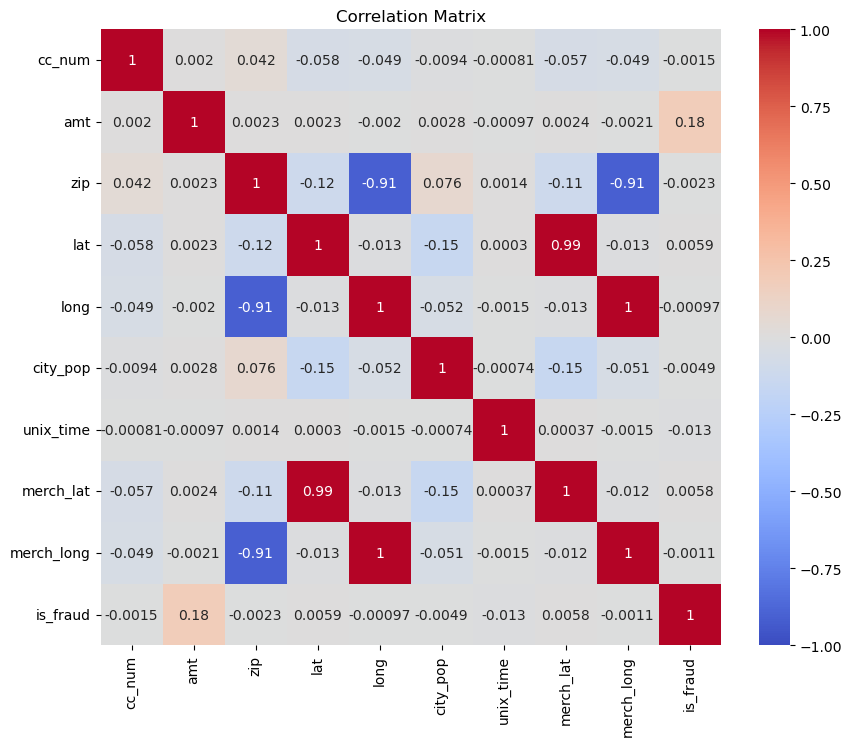

In [10]:
# Select only numeric columns for correlation calculation
numeric_columns = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

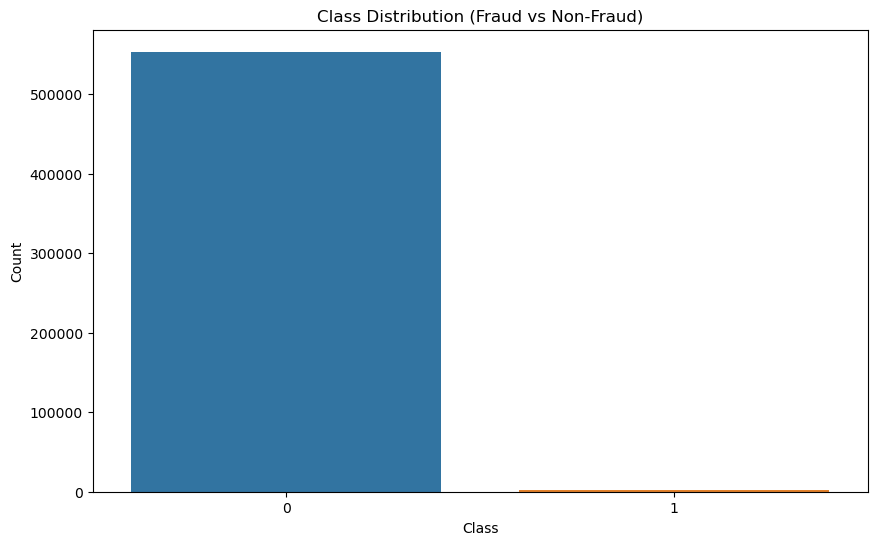

In [15]:
## Feature 1 "is_fraud"
# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='is_fraud', data=df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

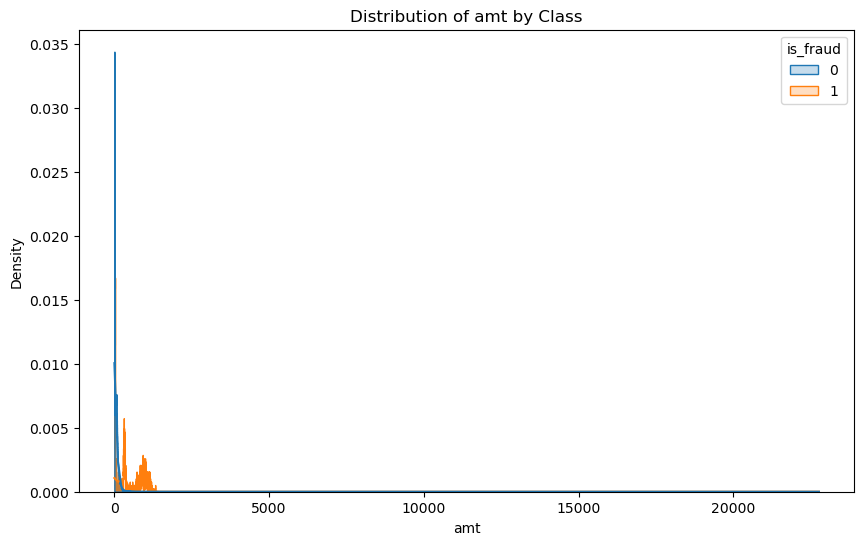

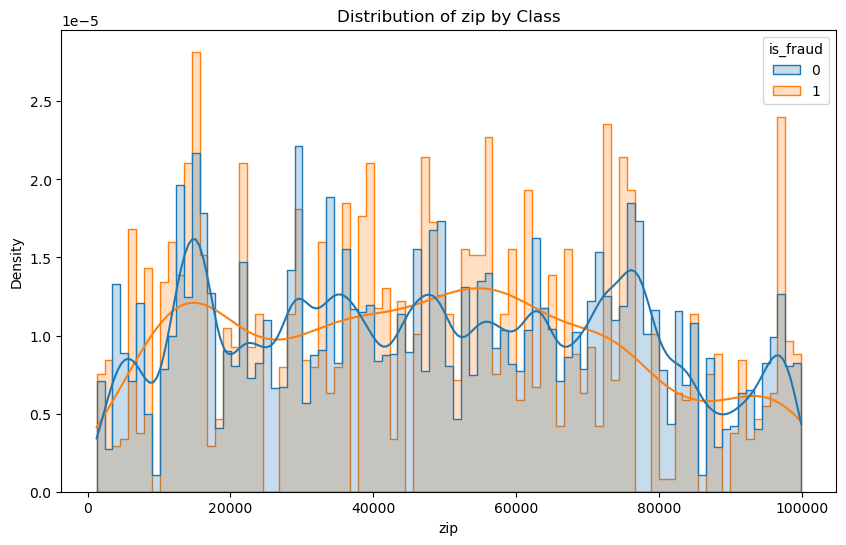

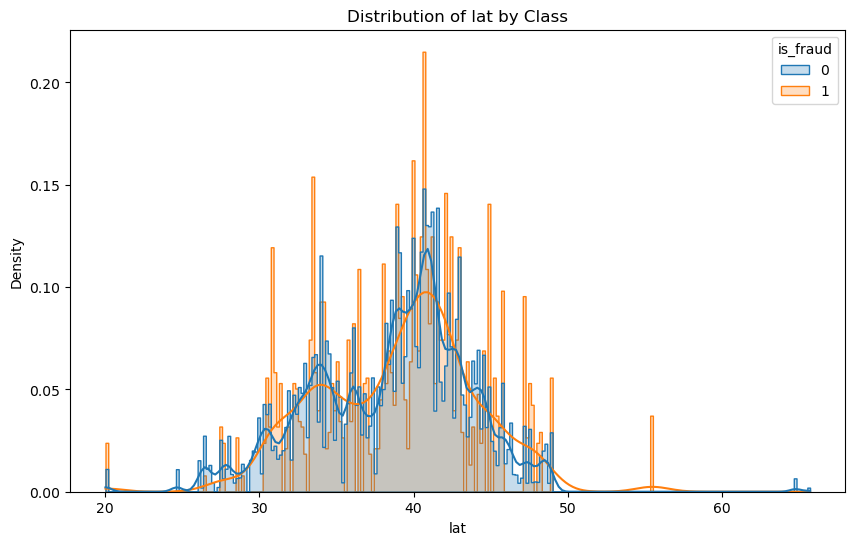

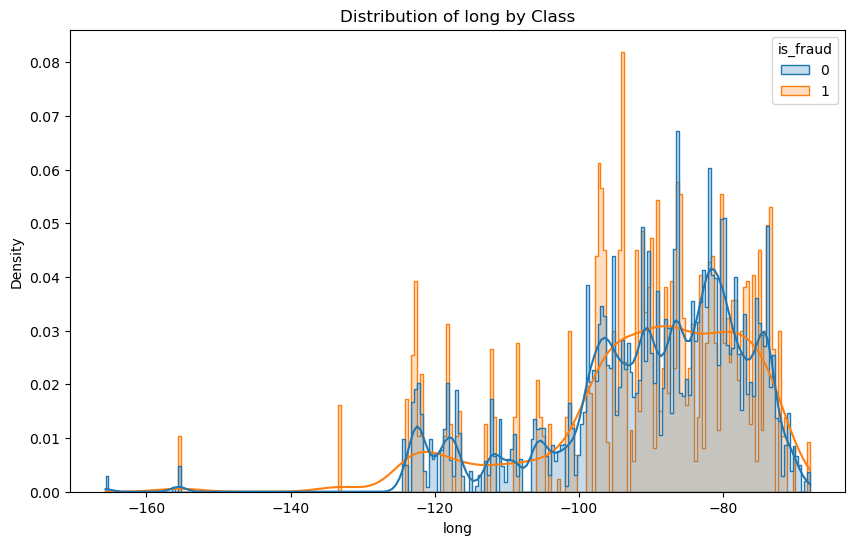

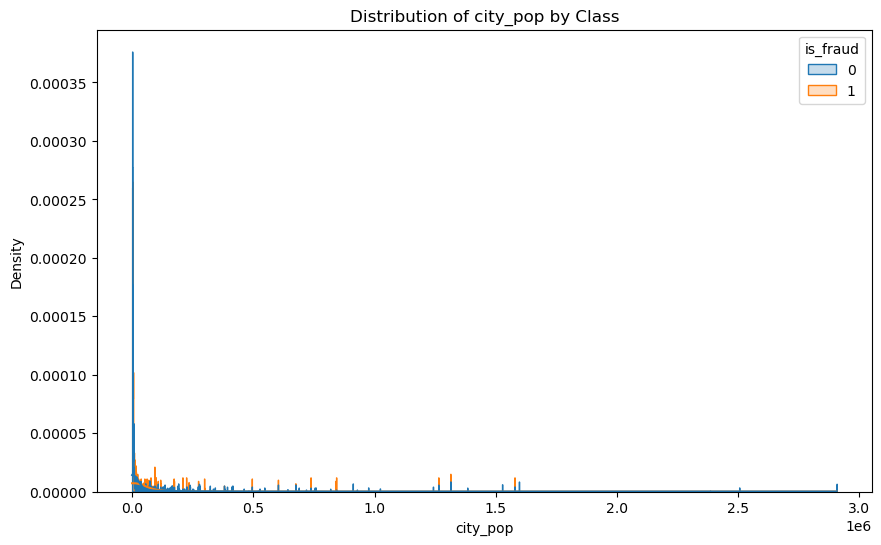

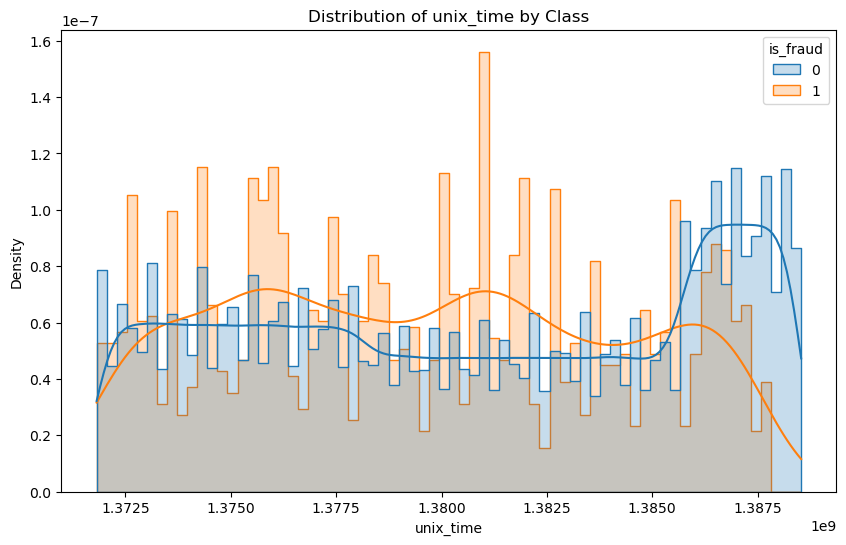

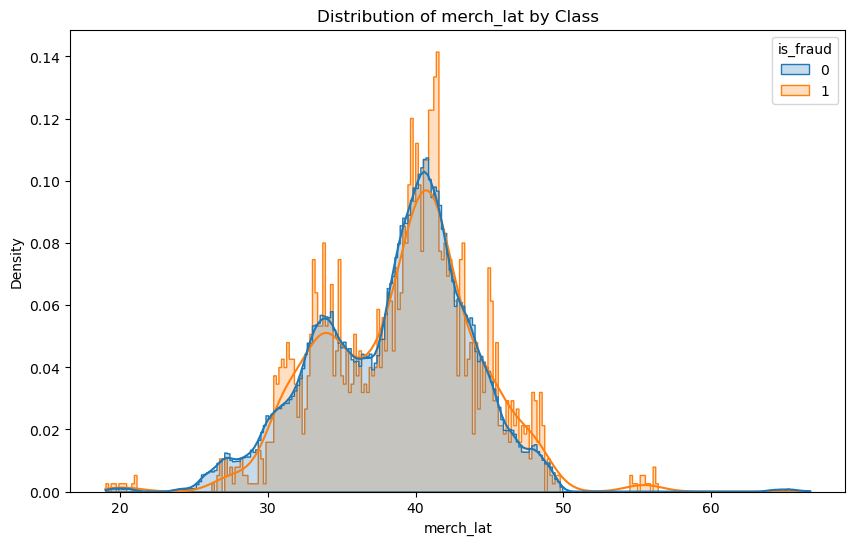

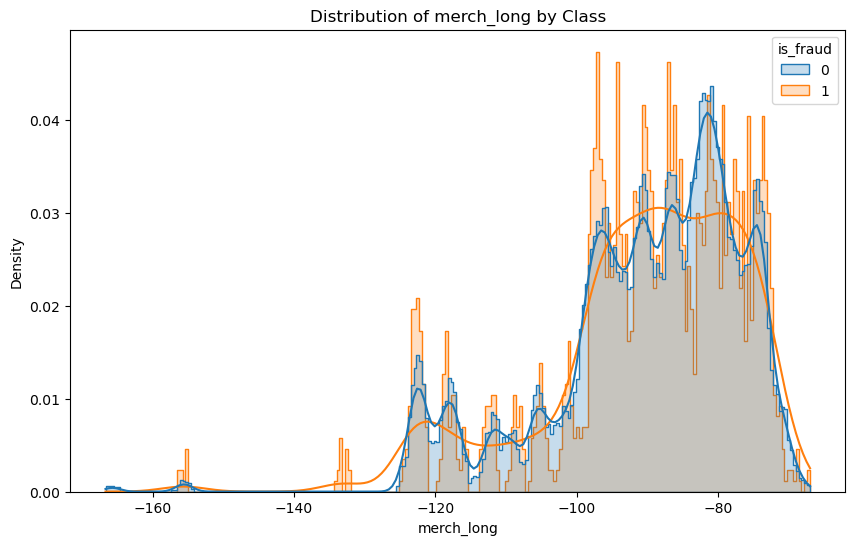

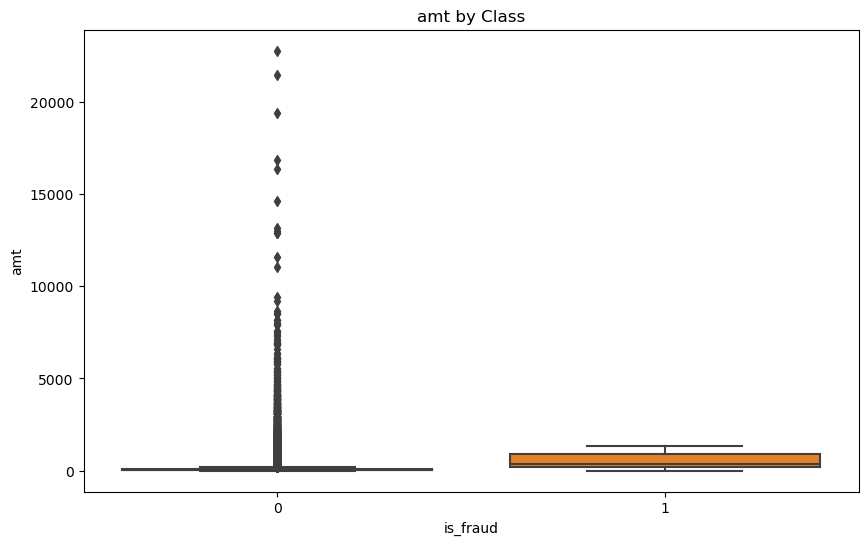

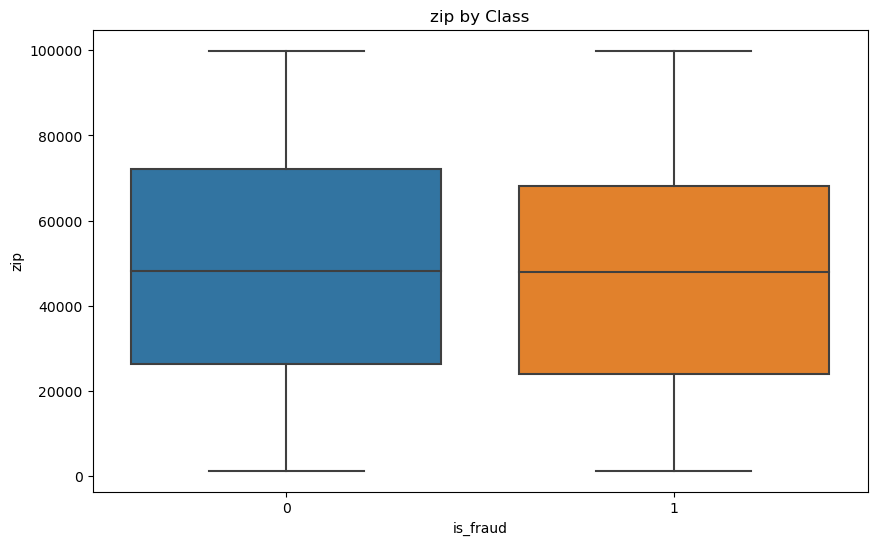

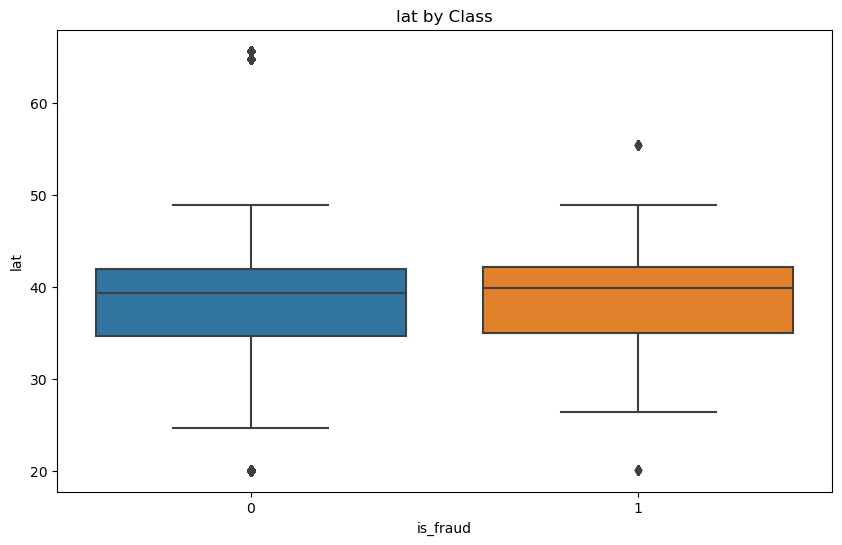

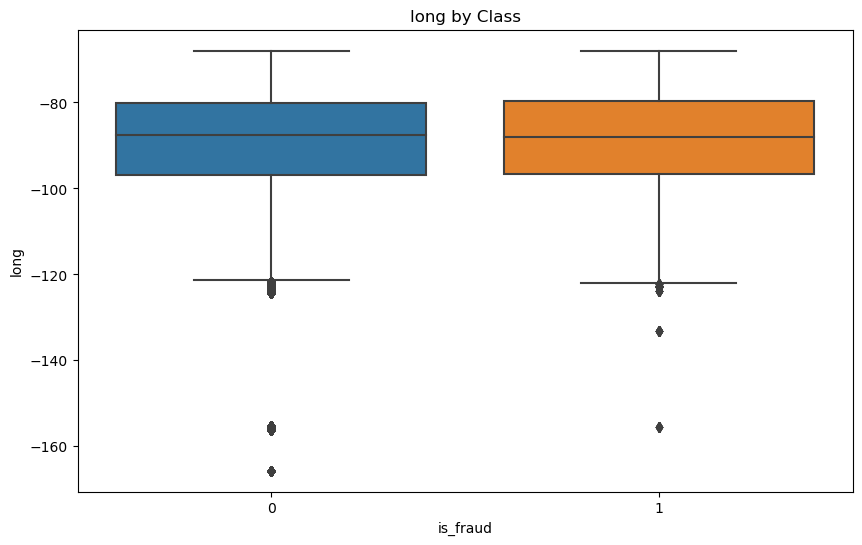

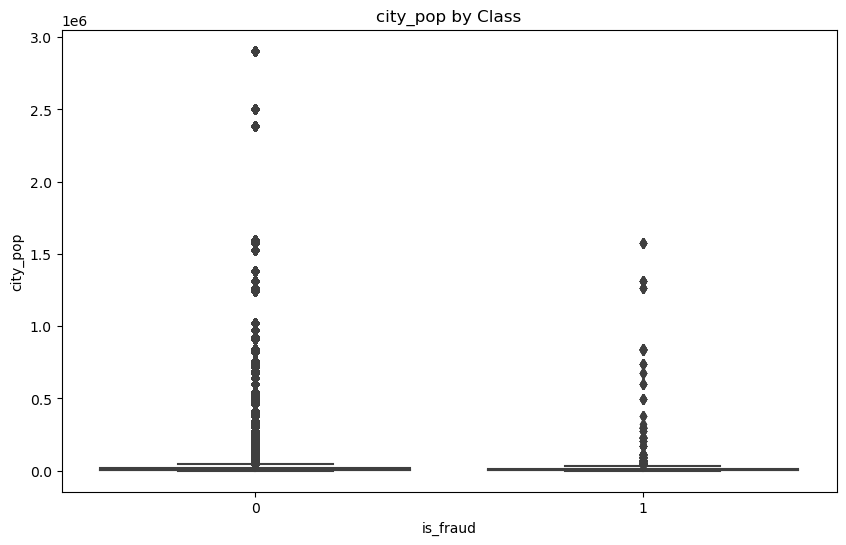

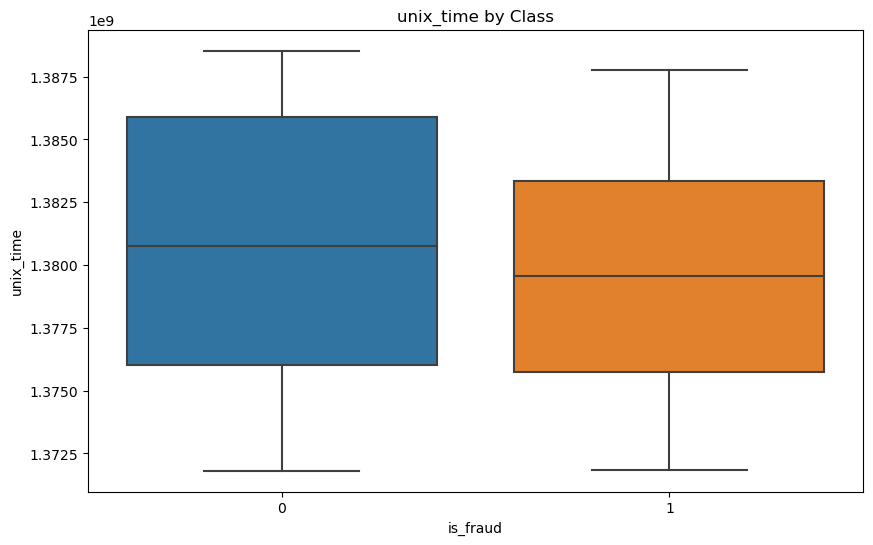

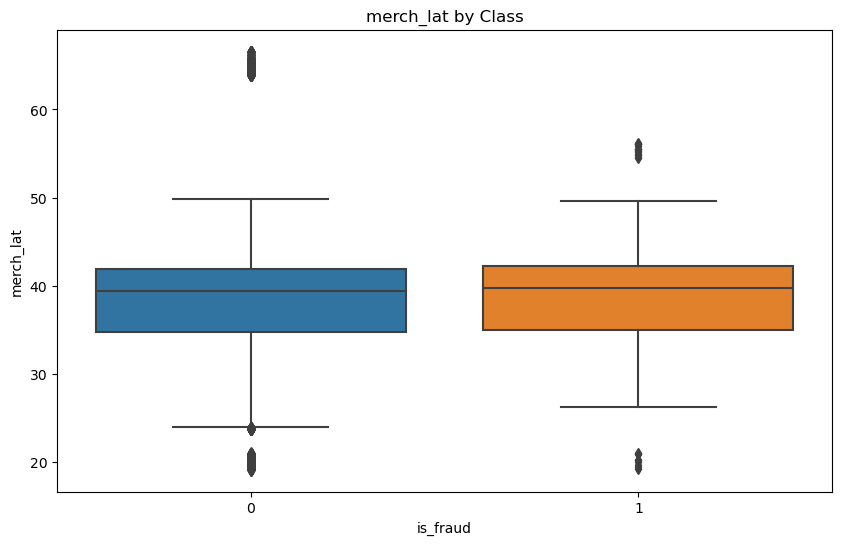

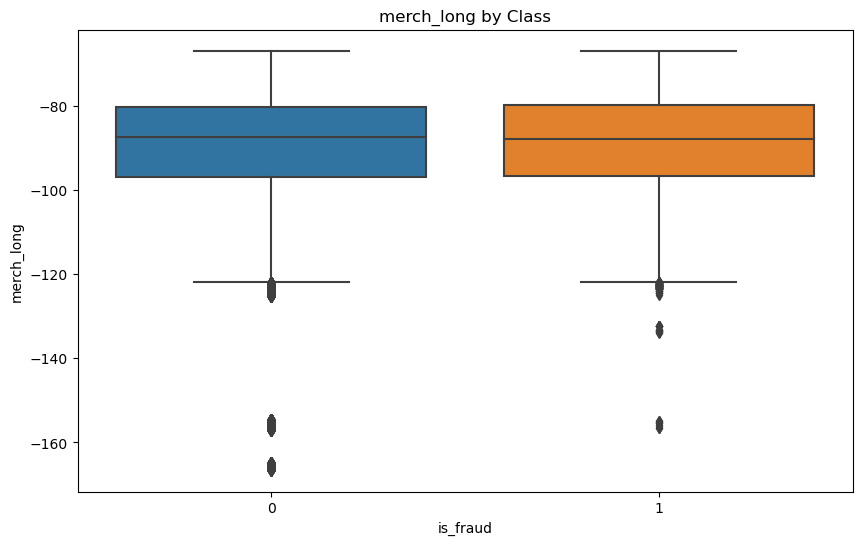

In [16]:
##Feature "is_fraud" against features - 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long'
# Function to plot the distribution of features based on class
def plot_feature_distribution(df, features):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=feature, hue='is_fraud', kde=True, element="step", stat="density", common_norm=False)
        plt.title(f'Distribution of {feature} by Class')
        plt.show()

# List of features to plot
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Plot the distributions
plot_feature_distribution(df, features)

# Function to plot boxplots of features based on class
def plot_feature_boxplots(df, features):
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='is_fraud', y=feature, data=df)
        plt.title(f'{feature} by Class')
        plt.show()

# Plot the boxplots
plot_feature_boxplots(df, features)

In [17]:
# Convert 'trans_date' to datetime format
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Extract month and year from 'trans_date'
df['trans_month_year'] = df['trans_date'].dt.to_period('M')

print(df['trans_date'].dtype)


datetime64[ns]


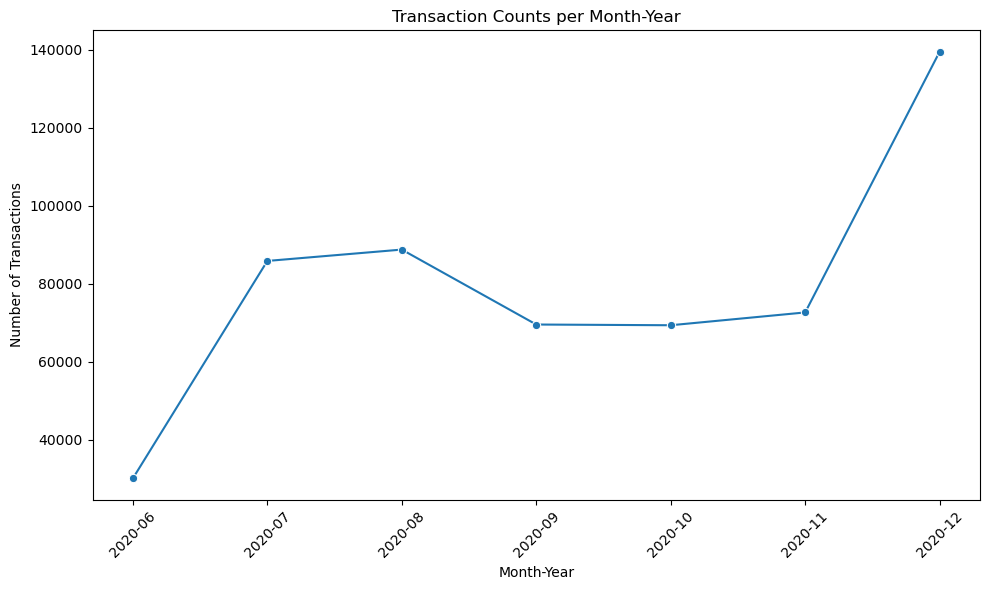

In [18]:
## Feature 2 trans_date
# EDA based on trans_month_year 
# Example: Count of transactions per month and year
transaction_counts = df['trans_month_year'].value_counts().sort_index()

# Plotting transaction counts over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=transaction_counts.index.astype(str), y=transaction_counts.values, marker='o')
plt.xticks(rotation=45)
plt.title('Transaction Counts per Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

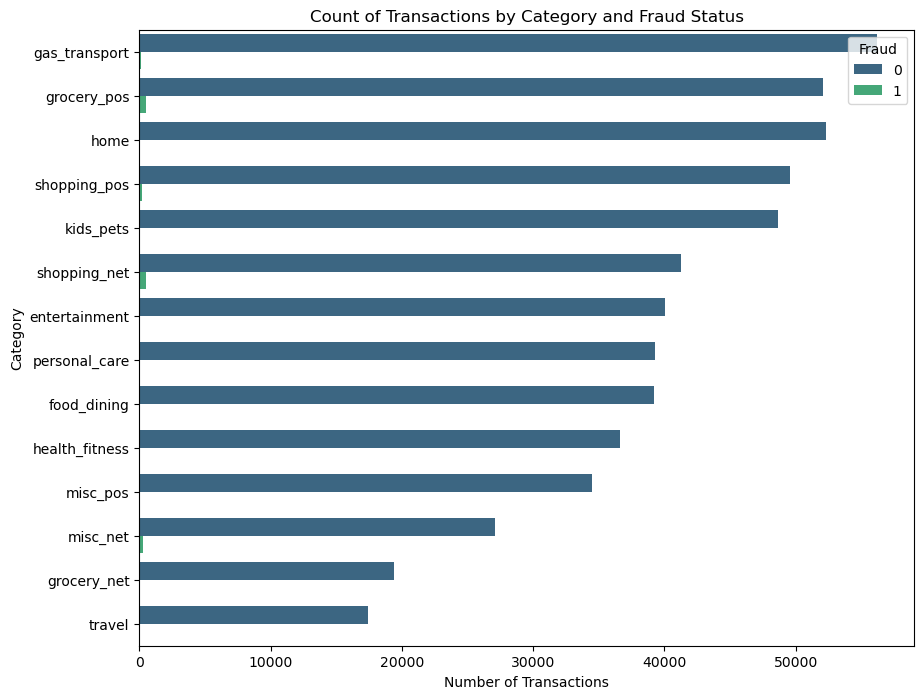

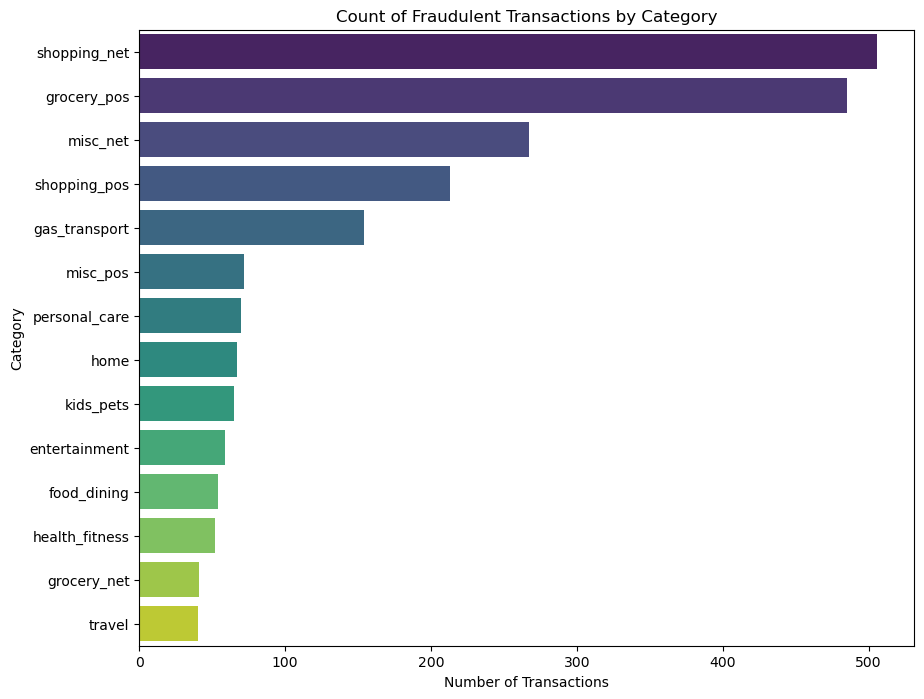

In [19]:
##Feature by category , by category vs is_fraud
# Plotting the horizontal bar plot for transactions by category
plt.figure(figsize=(10, 8))

# Countplot for both fraudulent and non-fraudulent transactions
sns.countplot(y='category', hue='is_fraud', data=df, palette='viridis', order=df['category'].value_counts().index)

plt.title('Count of Transactions by Category and Fraud Status')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.legend(title='Fraud', loc='upper right')
plt.show()


# Filter the DataFrame for fraudulent transactions
df_fraud = df[df['is_fraud'] == 1]
# Plotting the horizontal bar plot for fraudulent transactions by category
plt.figure(figsize=(10, 8))
# Countplot for fraudulent transactions
sns.countplot(y='category', data=df_fraud, palette='viridis', order=df_fraud['category'].value_counts().index)
plt.title('Count of Fraudulent Transactions by Category')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.show()

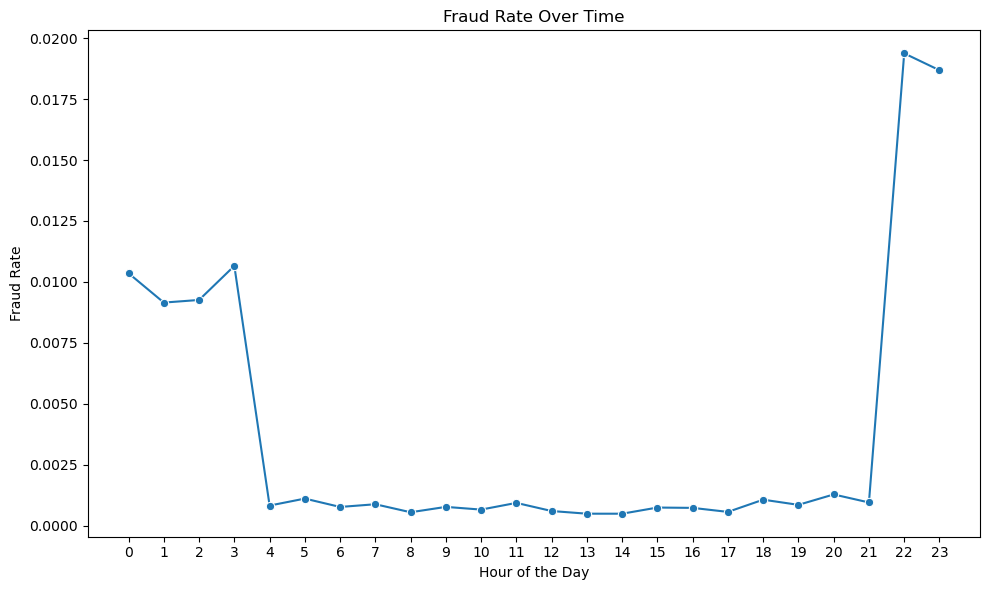

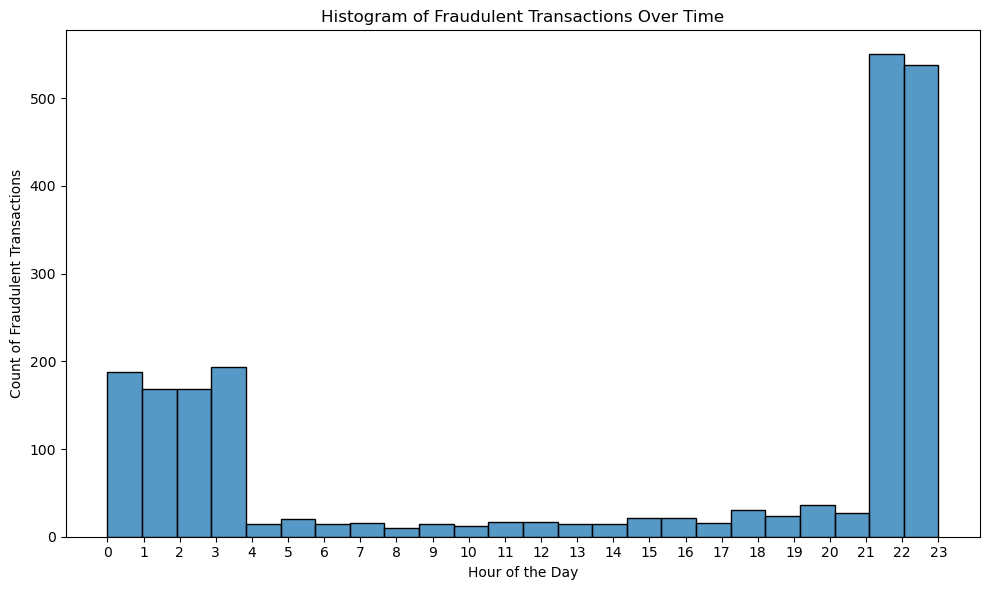

In [20]:
#Combine 'trans_date' and 'trans_time' into a single datetime column
df['trans_date_time'] = pd.to_datetime(df['trans_date'].astype(str) + ' ' + df['trans_time'].astype(str))

# Calculate fraud rate by hour of the day
fraud_by_hour = df.groupby(df['trans_date_time'].dt.hour)['is_fraud'].mean()

# Plotting fraud analysis by time
plt.figure(figsize=(10, 6))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o')
plt.title('Fraud Rate Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Fraud Rate')
plt.xticks(range(24))
plt.tight_layout()
plt.show()


## The fradulent activities in histogram

# Filter the DataFrame for fraudulent transactions
df_fraud = df[df['is_fraud'] == 1]

# Plot histogram for fraudulent transactions over time
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fraud, x=df_fraud['trans_date_time'].dt.hour, bins=24)
plt.title('Histogram of Fraudulent Transactions Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
from datetime import datetime, time

# Assuming df is your DataFrame
# Convert 'trans_date' and 'dob' to datetime format
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['dob'] = pd.to_datetime(df['dob'])

# Convert 'trans_time' to a proper datetime format (assuming 'trans_time' contains only time)
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.time

# Combine 'trans_date' and 'trans_time' into a single datetime column
df['trans_date_trans_time'] = df.apply(lambda row: datetime.combine(row['trans_date'], row['trans_time']), axis=1)

# Create new features: 'transaction_hour', 'transaction_day', 'transaction_month', 'age'
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df['age'] = (df['trans_date'] - df['dob']).dt.days // 365

# Display the first few rows to verify
print(df.head())

  trans_date trans_time        cc_num                              merchant  \
0 2020-06-21   12:14:00  2.291160e+15                 fraud_Kirlin and Sons   
1 2020-06-21   12:14:00  3.573030e+15                  fraud_Sporer-Keebler   
2 2020-06-21   12:14:00  3.598220e+15  fraud_Swaniawski, Nitzsche and Welch   
3 2020-06-21   12:15:00  3.591920e+15                     fraud_Haley Group   
4 2020-06-21   12:15:00  3.526830e+15                 fraud_Johnston-Casper   

         category    amt   first      last gender  \
0   personal_care   2.86    Jeff   Elliott      M   
1   personal_care  29.84  Joanne  Williams      F   
2  health_fitness  41.28  Ashley     Lopez      F   
3        misc_pos  60.05   Brian  Williams      M   
4          travel   3.19  Nathan    Massey      M   

                        street  ...  merch_lat  merch_long  is_fraud  \
0            351 Darlene Green  ...  33.986391  -81.200714         0   
1             3638 Marsh Union  ...  39.450498 -109.960431    

In [22]:
# Calculate the geographical distance between cardholder and merchant
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

In [23]:
df['distance'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

In [24]:
# Calculate transaction frequency and average amount within the last 24 hours
df = df.sort_values(by=['cc_num', 'trans_date_trans_time'])
df['trans_24h_count'] = df.groupby('cc_num').apply(lambda x: x.rolling('24h', on='trans_date_trans_time').trans_date_trans_time.count()).reset_index(level=0, drop=True)
df['trans_24h_amount_avg'] = df.groupby('cc_num').apply(lambda x: x.rolling('24h', on='trans_date_trans_time').amt.mean()).reset_index(level=0, drop=True)

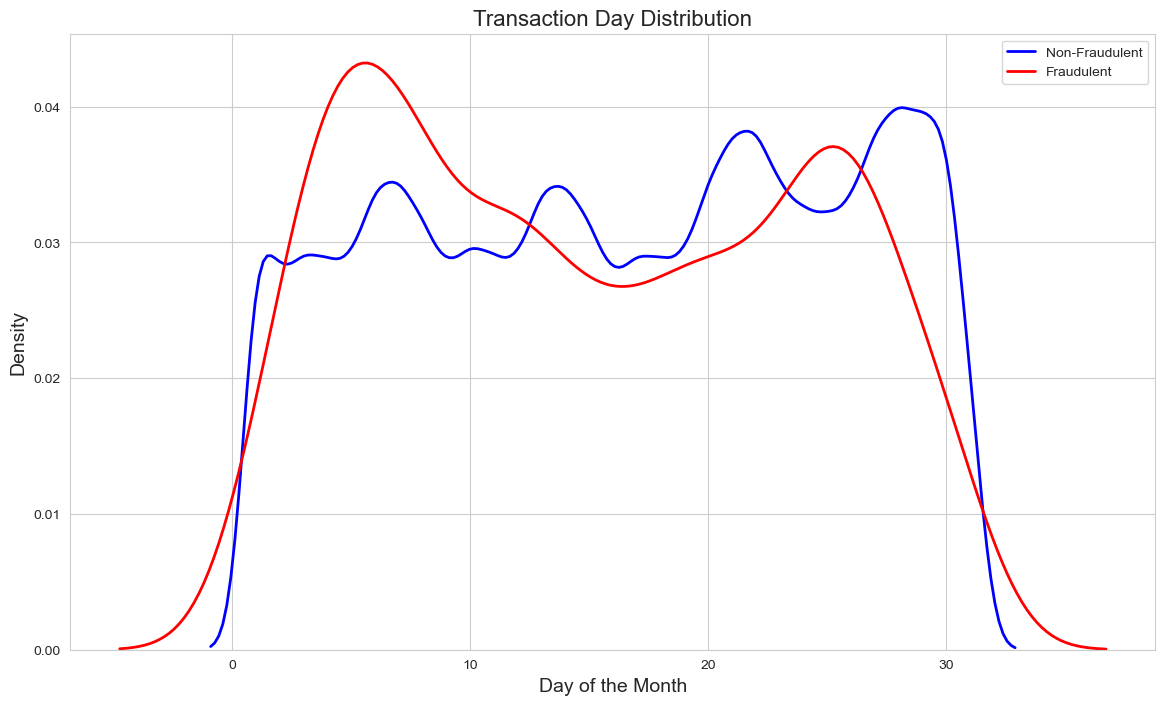

Correlation between transaction day and fraud: -0.01


In [25]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Improved Visualization: Transaction Day
plt.figure(figsize=(14, 8))

# Plot density plots
sns.kdeplot(df[df['is_fraud'] == 0]['transaction_day'], color='blue', label='Non-Fraudulent', lw=2)
sns.kdeplot(df[df['is_fraud'] == 1]['transaction_day'], color='red', label='Fraudulent', lw=2)

# Add title and labels
plt.title('Transaction Day Distribution', fontsize=16)
plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.show()

# Calculate correlation between transaction day and fraud
correlation = df['transaction_day'].corr(df['is_fraud'])

print(f"Correlation between transaction day and fraud: {correlation:.2f}")

Correlation between transaction amount and fraud: 0.18


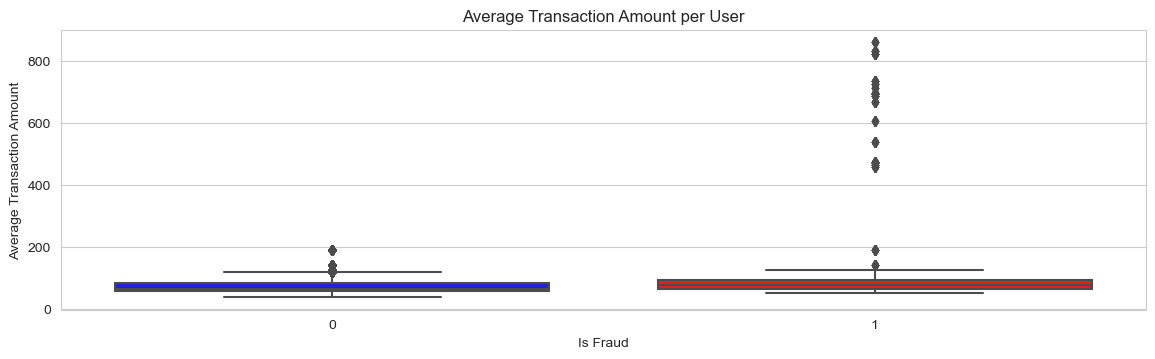

In [26]:
## Feature - cc_num and amt
# Calculate the average and total transaction amount per user
df['avg_trans_amount'] = df.groupby('cc_num')['amt'].transform('mean')
df['total_trans_amount'] = df.groupby('cc_num')['amt'].transform('sum')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualization: Average Transaction Amount per User
plt.figure(figsize=(14, 8))

# Boxplot
plt.subplot(2, 1, 1)
sns.boxplot(x='is_fraud', y='avg_trans_amount', data=df, palette={0: 'blue', 1: 'red'})
plt.title('Average Transaction Amount per User')
plt.xlabel('Is Fraud')
plt.ylabel('Average Transaction Amount')

# Calculate correlation between transaction amount ('amt') and fraud ('is_fraud')
correlation = df['amt'].corr(df['is_fraud'])

print(f"Correlation between transaction amount and fraud: {correlation:.2f}")


Average Transaction Amount by Age Range:
  age_range        amt
0     20-29  68.394439
1     30-39  73.448913
2     40-49  72.822523
3     50-59  66.206320
4     60-69  64.836601
5     70-79  65.259275
6     80-89  64.584630
7     90-99  63.852374


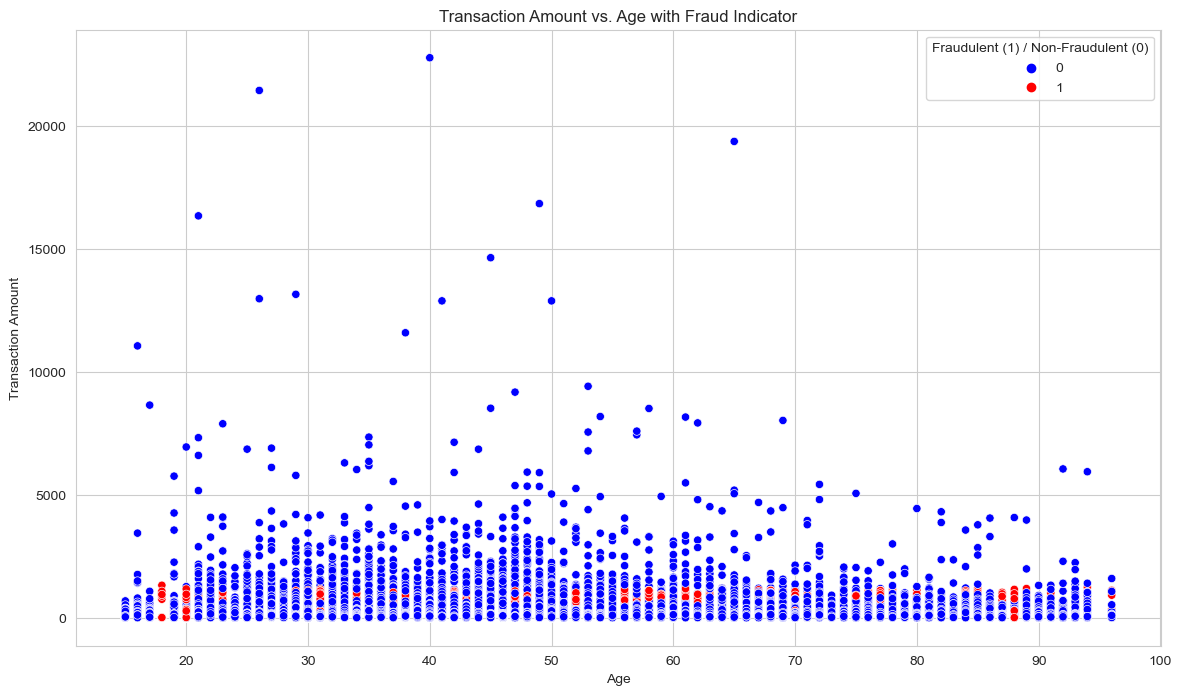

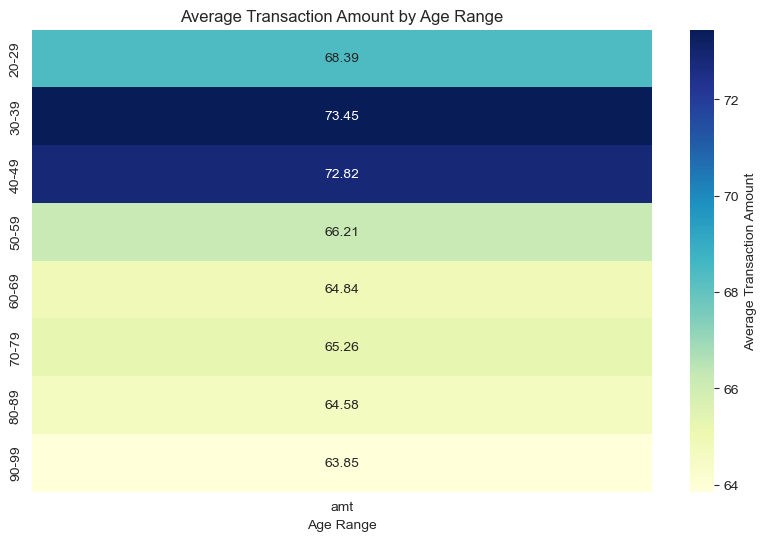

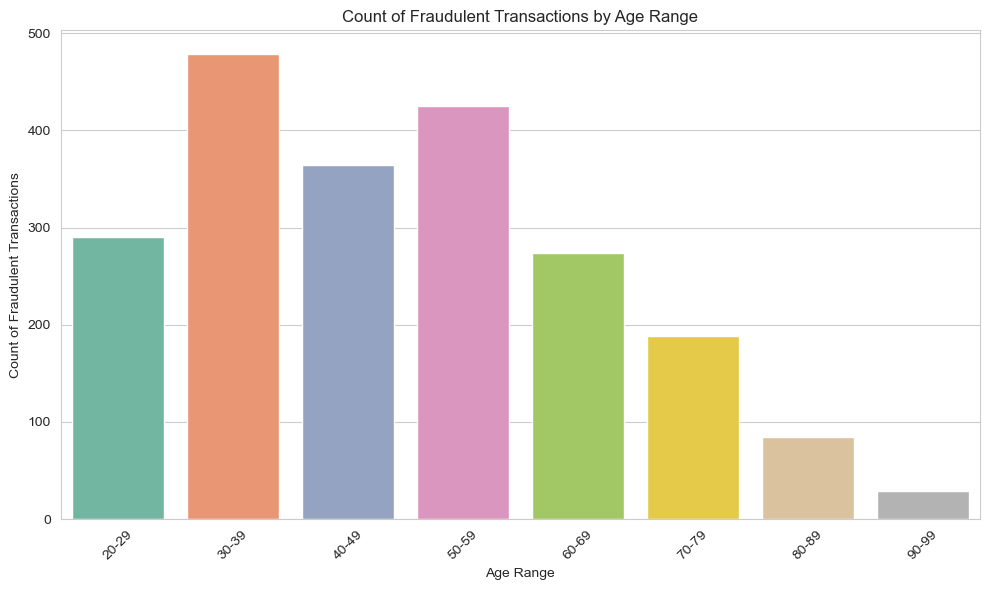


Summary of Transaction Data by Age Range:
  age_range    avg_amt  med_amt  fraudulent_count
0     20-29  68.394439   45.970               290
1     30-39  73.448913   51.110               479
2     40-49  72.822523   50.800               364
3     50-59  66.206320   42.830               425
4     60-69  64.836601   41.980               274
5     70-79  65.259275   43.420               188
6     80-89  64.584630   42.445                84
7     90-99  63.852374   44.035                29


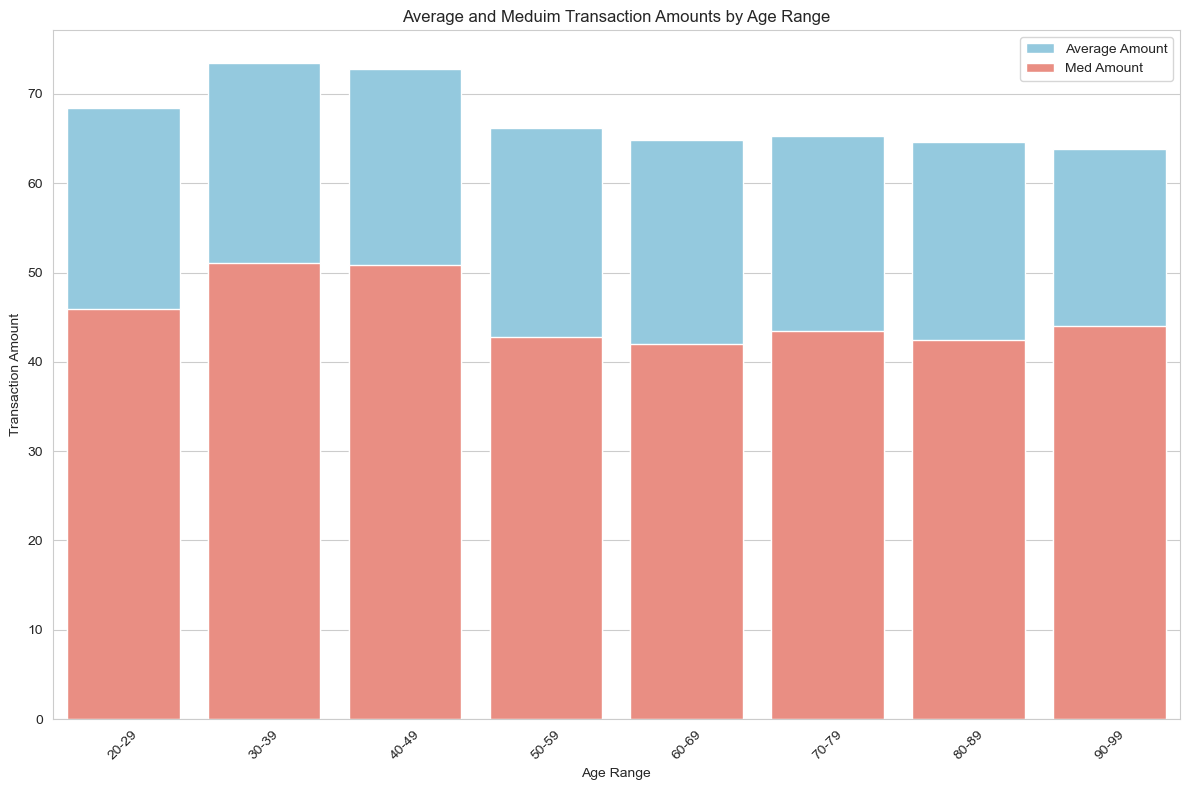

In [27]:

# Convert 'trans_date_trans_time' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

# Calculate age from 'dob'
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y', errors='coerce')
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# Plot Transaction Amount vs. Age with Fraud Indicator
plt.figure(figsize=(14, 8))
sns.scatterplot(x='age', y='amt', hue='is_fraud', palette=['blue', 'red'], data=df)
plt.title('Transaction Amount vs. Age with Fraud Indicator')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.legend(title='Fraudulent (1) / Non-Fraudulent (0)')

# Calculate average transaction amount by age range
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_amt_table = df.groupby('age_range')['amt'].mean().reset_index()

# Display as a table
print("\nAverage Transaction Amount by Age Range:")
print(age_amt_table)

# Create a heatmap of average transaction amount by age range
heatmap_data = df.groupby('age_range')['amt'].mean().reset_index()
heatmap_data['age_range'] = pd.Categorical(heatmap_data['age_range'], categories=labels, ordered=True)
heatmap_data = heatmap_data.pivot_table(index='age_range', values='amt', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Transaction Amount'})
plt.title('Average Transaction Amount by Age Range')
plt.xlabel('Age Range')
plt.ylabel('')

# Count fraudulent transactions per age range
fraud_counts = df[df['is_fraud'] == 1].groupby('age_range').size().reset_index(name='fraudulent_count')

# Plot fraudulent transaction counts
plt.figure(figsize=(10, 6))
sns.barplot(x='age_range', y='fraudulent_count', data=fraud_counts, palette='Set2')
plt.title('Count of Fraudulent Transactions by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Calculate average transaction amount by age range
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate average transaction amount and maximum transaction amount by age range
summary_data = df.groupby('age_range').agg({
    'amt': ['mean', 'median'],
    'is_fraud': lambda x: (x == 1).sum()
}).reset_index()
summary_data.columns = ['age_range', 'avg_amt', 'med_amt', 'fraudulent_count']

# Display as a table
print("\nSummary of Transaction Data by Age Range:")
print(summary_data)


# Visualize average and maximum transaction amounts by age range
plt.figure(figsize=(12, 8))
sns.barplot(x='age_range', y='avg_amt', data=summary_data, color='skyblue', label='Average Amount')
sns.barplot(x='age_range', y='med_amt', data=summary_data, color='salmon', label='Med Amount')
plt.title('Average and Meduim Transaction Amounts by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Transaction Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

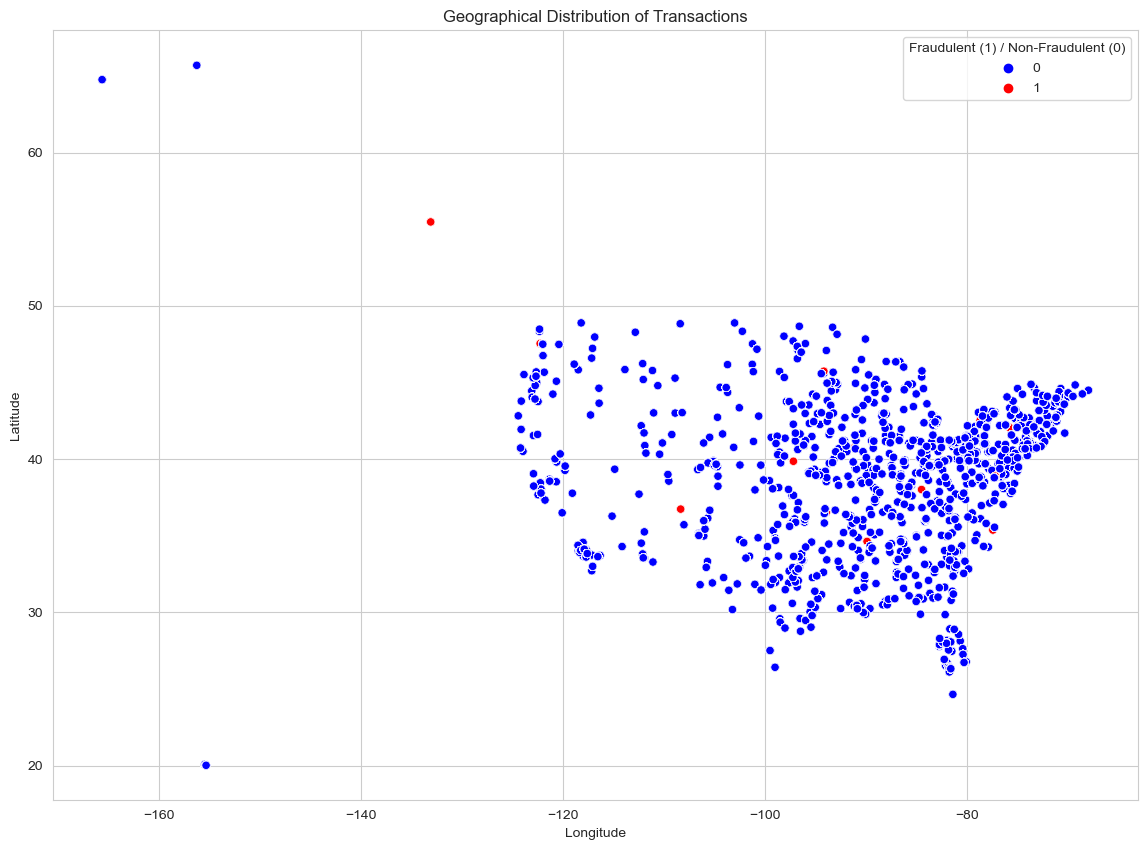

Text(0, 0.5, 'State')

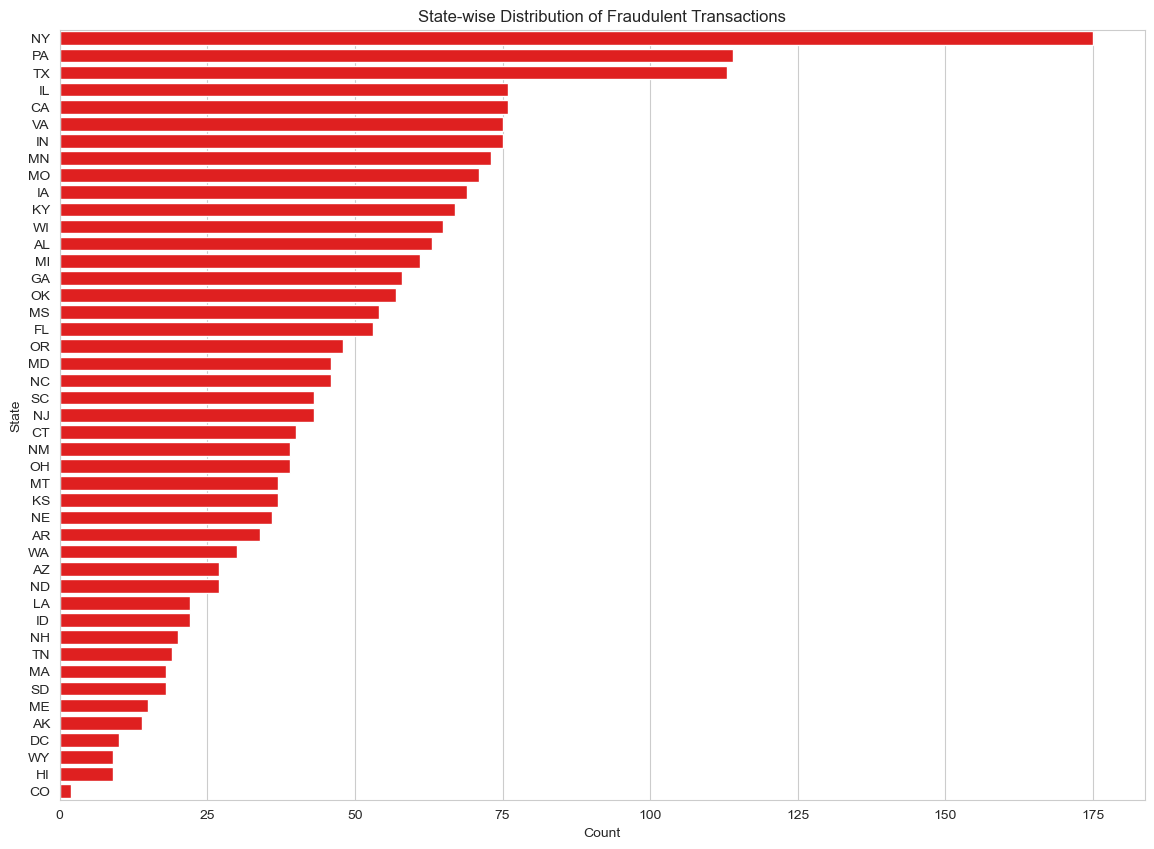

In [28]:
## Features - state, city , street
# Plot geographical distribution
plt.figure(figsize=(14, 10))
sns.scatterplot(x='long', y='lat', hue='is_fraud', palette=['blue', 'red'], data=df)
plt.title('Geographical Distribution of Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fraudulent (1) / Non-Fraudulent (0)')
plt.show()


# Filter the dataset to include only fraudulent transactions
df_fraud = df[df['is_fraud'] == 1]

# Plot State-wise Distribution of Fraudulent Transactions
plt.figure(figsize=(14, 10))
sns.countplot(y='state', data=df_fraud, order=df_fraud['state'].value_counts().index, palette=['red'])
plt.title('State-wise Distribution of Fraudulent Transactions')
plt.xlabel('Count')
plt.ylabel('State')

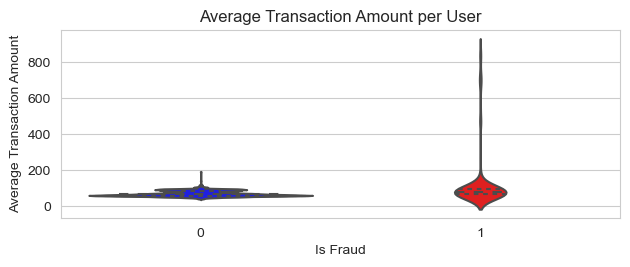

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [29]:
# Violin plot
plt.subplot(2, 1, 2)
sns.violinplot(x='is_fraud', y='avg_trans_amount', data=df, palette={0: 'blue', 1: 'red'}, inner='quartile')
plt.title('Average Transaction Amount per User')
plt.xlabel('Is Fraud')
plt.ylabel('Average Transaction Amount')

plt.tight_layout()
plt.show()

# Visualization: Total Transaction Amount per User
plt.figure(figsize=(14, 8))

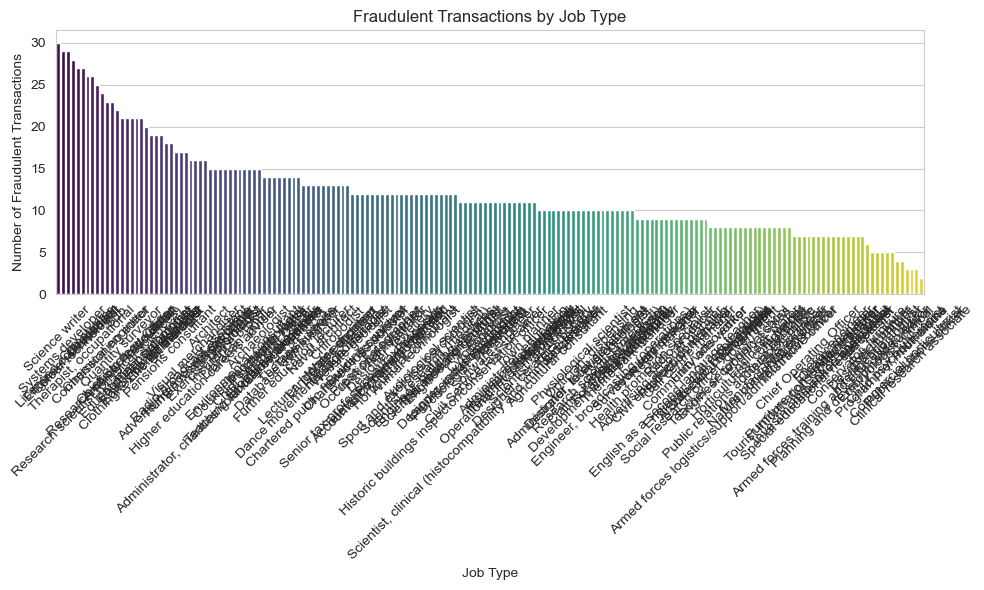

In [30]:
# Filter for transactions where is_fraud is 1
df_fraud = df[df['is_fraud'] == 1]

# Count the occurrences of each job type in fraudulent transactions
job_counts = df_fraud['job'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Fraudulent Transactions by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\singh\AppData\Local\Temp\ipykernel_43808\956050825.py:6: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('C:/Users/singh/Desktop/TIP_2/fraudTest.csv', parse_dates=['trans_date_trans_time'])



Mean, Median, and Max Transaction Amounts for Fraudulent Transactions by Job Type:
                                                        mean   median      max
job                                                                           
Accountant, chartered certified                   572.048333  519.495  1107.04
Administrator                                     594.242500  690.215  1023.35
Administrator, charities/voluntary organisations  363.962667  322.250   962.80
Administrator, education                          734.920000  838.930  1158.64
Administrator, local government                   820.295000  981.175  1153.08
...                                                      ...      ...      ...
Tree surgeon                                      548.899231  662.940  1028.41
Video editor                                      744.217500  838.590   969.07
Visual merchandiser                               532.173125  478.260  1034.33
Water engineer                                 

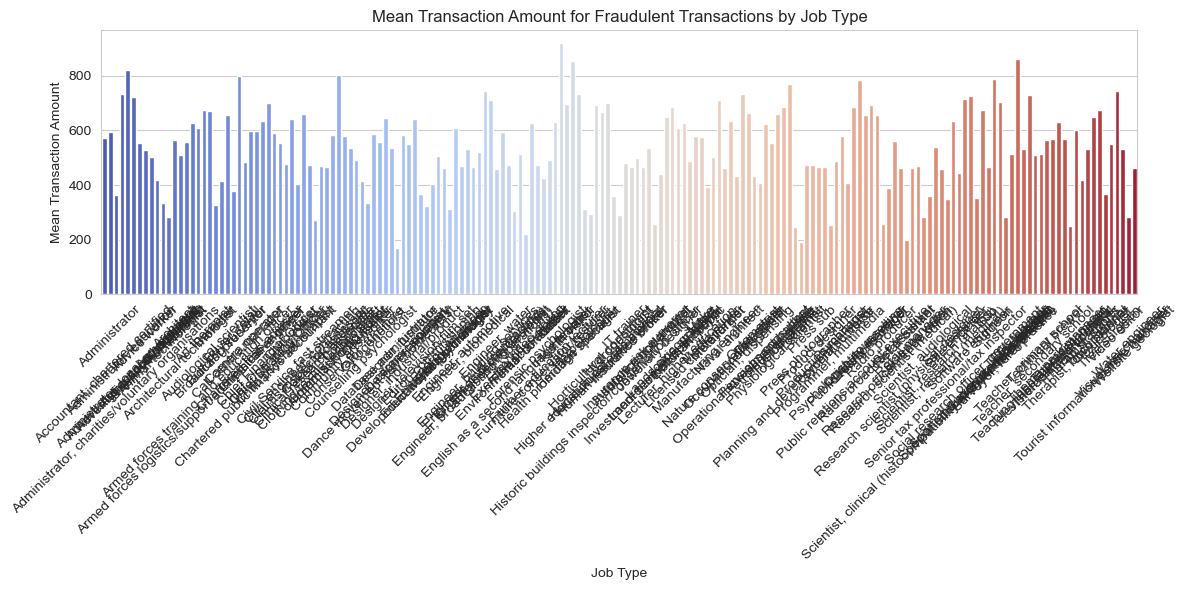

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:/Users/singh/Desktop/TIP_2/fraudTest.csv', parse_dates=['trans_date_trans_time'])

# Filter for transactions where is_fraud is 1
df_fraud = df[df['is_fraud'] == 1]

# Calculate mean, median, and max transaction amounts by job type
fraud_stats = df_fraud.groupby('job')['amt'].agg(['mean', 'median', 'max'])

# Print the statistics
print("\nMean, Median, and Max Transaction Amounts for Fraudulent Transactions by Job Type:")
print(fraud_stats)

# Plotting the bar chart for mean transaction amount
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_stats.index, y=fraud_stats['mean'], palette='coolwarm')
plt.title('Mean Transaction Amount for Fraudulent Transactions by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Mean Transaction Amount')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Outliers Handling

In [53]:
# Calculate quartiles
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]

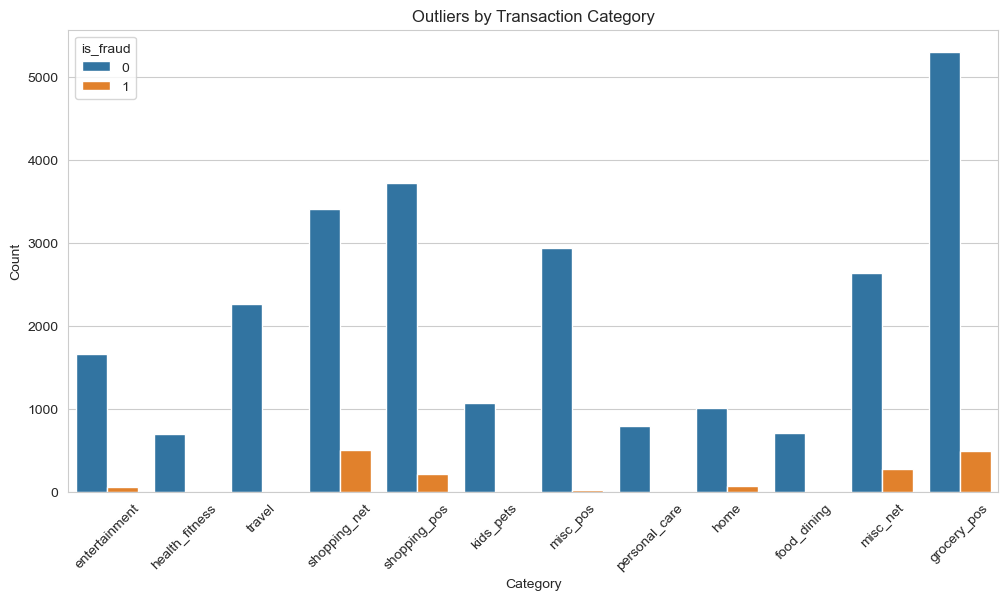

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=outliers)
plt.title('Outliers by Transaction Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

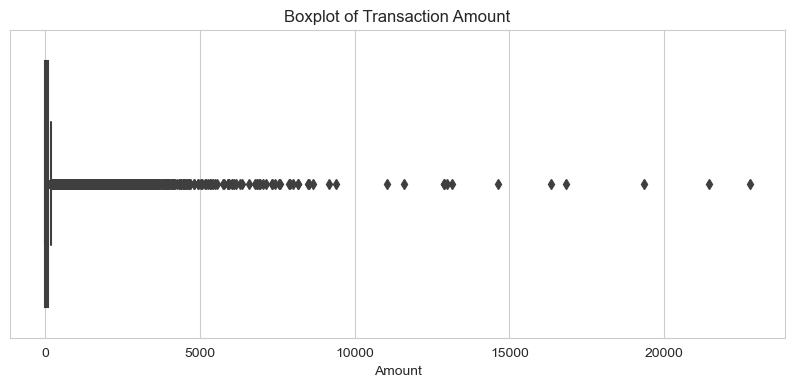

In [55]:
# Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x='amt', data=df)
plt.title('Boxplot of Transaction Amount')
plt.xlabel('Amount')
plt.show()

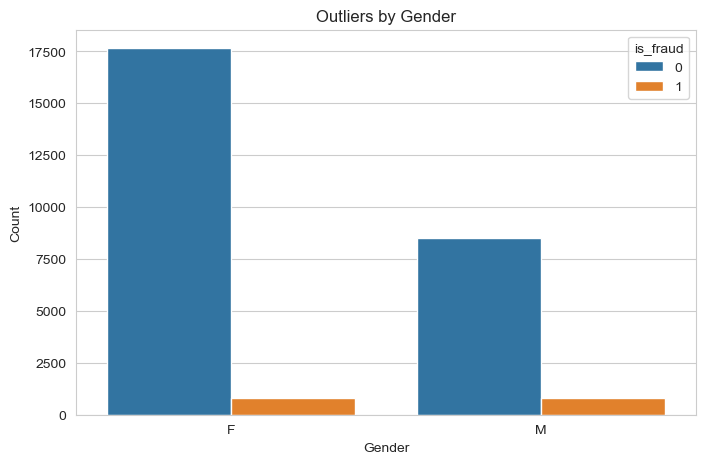

In [56]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='is_fraud', data=outliers)
plt.title('Outliers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [32]:
# Assuming 'outliers' DataFrame contains your identified outliers
# Calculate the total number of outliers
total_outliers = outliers.shape[0]

# Calculate the number of outliers that are fraud cases
fraud_outliers = outliers[outliers['is_fraud'] == 1].shape[0]

# Calculate the percentage of outliers that are fraud cases
percentage_fraud_outliers = (fraud_outliers / total_outliers) * 100

print(f"Total number of outliers: {total_outliers}")
print(f"Number of fraud cases among outliers: {fraud_outliers}")
print(f"Percentage of outliers that are fraud cases: {percentage_fraud_outliers:.2f}%")

NameError: name 'outliers' is not defined

Text(0, 0.5, 'Count')

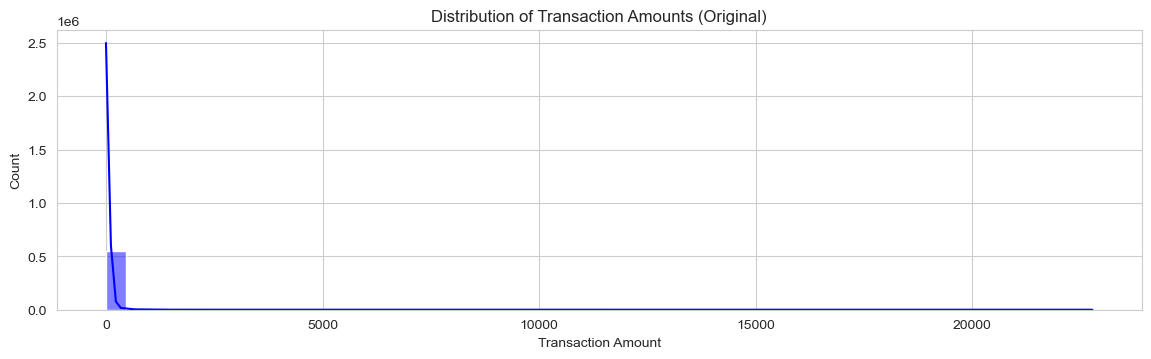

In [58]:
# Step 1: Evaluate Outlier Impact
plt.figure(figsize=(14, 8))

# Plot original distribution
plt.subplot(2, 1, 1)
sns.histplot(df['amt'], kde=True, bins=50, color='blue')
plt.title('Distribution of Transaction Amounts (Original)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

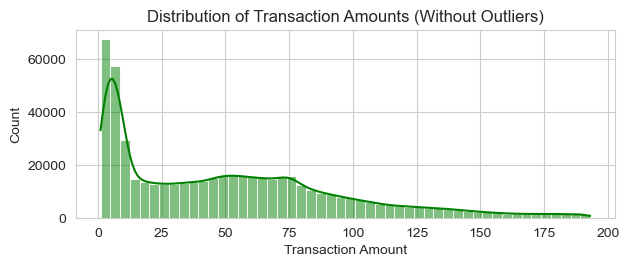

In [59]:
# Plot distribution without outliers
plt.subplot(2, 1, 2)
sns.histplot(df[~df.index.isin(outliers.index)]['amt'], kde=True, bins=50, color='green')
plt.title('Distribution of Transaction Amounts (Without Outliers)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

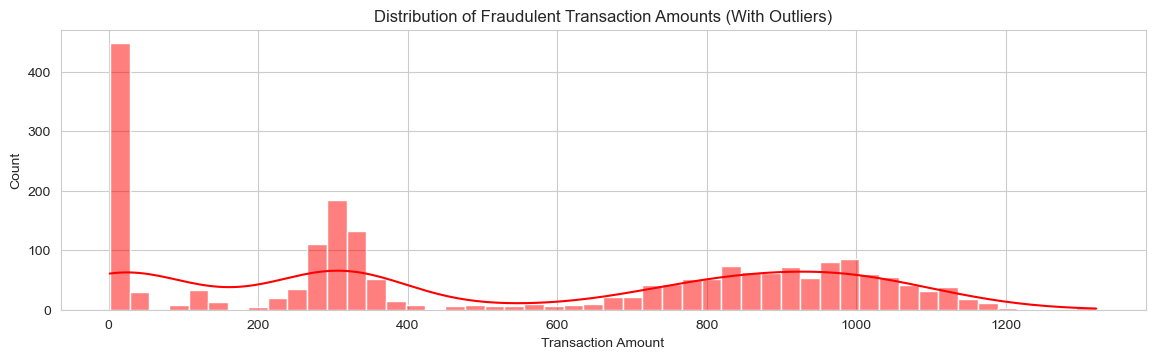

In [60]:
# Step 2: Consider Analysis Goals
# Example: If fraud detection is the goal, visualize fraudulent transactions with and without outliers
plt.figure(figsize=(14, 8))

# Plot fraudulent transactions with outliers
plt.subplot(2, 1, 1)
sns.histplot(df[df['is_fraud'] == 1]['amt'], kde=True, bins=50, color='red')
plt.title('Distribution of Fraudulent Transaction Amounts (With Outliers)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

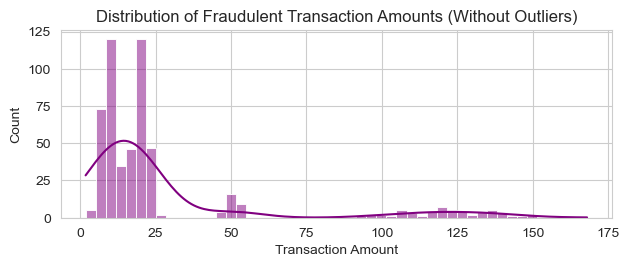

In [61]:
# Plot fraudulent transactions without outliers
plt.subplot(2, 1, 2)
sns.histplot(df[(df['is_fraud'] == 1) & (~df.index.isin(outliers.index))]['amt'], kde=True, bins=50, color='purple')
plt.title('Distribution of Fraudulent Transaction Amounts (Without Outliers)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Feature Engineering 

### 1. Transaction Frequency Features

In [34]:
#Statistic summary of total transaction per user
df['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])

mean       614.733407
median     636.500000
min          6.000000
max       2144.000000
Name: count, dtype: float64

### 1.1 Calculate total transactions per day per user

In [33]:
# Calculate total transactions of each user per day
df['transactions_per_day'] = df.groupby(['cc_num', df['trans_date']])['trans_date'].transform('count')

# Print the relevant columns to verify
print(df[['cc_num', 'trans_date', 'transactions_per_day']].head())

KeyError: 'trans_date'

### 1.2 Calculate total transactions per week per user

In [72]:
import pandas as pd

# Example data frame creation (replace with your actual data)
data = {
    'cc_num': [1234, 1234, 5678, 5678, 5678],
    'trans_date': pd.to_datetime(['2023-01-15', '2023-01-22', '2023-01-15', '2023-01-22', '2023-01-29']),
    'amt': [100, 200, 150, 250, 300]
}
df = pd.DataFrame(data)

# Create a 'Week' column using ISO calendar weeks
df['Week'] = df['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
df['transactions_per_week'] = df.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated dataframe with Week and total transactions per week for each customer columns
print(df[['cc_num', 'Week', 'transactions_per_week']].head())

   cc_num  Week  transactions_per_week
0    1234     2                      1
1    1234     3                      1
2    5678     2                      1
3    5678     3                      1
4    5678     4                      1


### 1.3 Calculate total transactions per month per user

In [73]:
# Calculate total transactions per user per month
df['transactions_per_month'] = df.groupby(['cc_num', df['trans_date'].dt.month])['trans_date'].transform('count')
print(df[['cc_num','transactions_per_month']].head())

   cc_num  transactions_per_month
0    1234                       2
1    1234                       2
2    5678                       3
3    5678                       3
4    5678                       3


### 1.4 Calculate total transactions per season per user

In [74]:
#Transaction per season of all users
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'
df['transactions_per_season'] = df.groupby(['cc_num', df['trans_date'].apply(season)])['trans_date'].transform('count')

### 1.5 Calculate total transactions in the last 7 days per user

In [75]:
# Get the maximum date in the dataset to define the last 7 days
max_date = df['trans_date'].max()

# Filter the dataset for transactions in the last 7 days
last_7_days_df = df[df['trans_date'] >= max_date - pd.Timedelta(days=7)]

# Calculate total transactions per user in the last 7 days
transactions_last_7_days = last_7_days_df.groupby('cc_num').size().reset_index(name='transactions_last_7_days')

# Merge total transactions back into the original dataset
df = pd.merge(df, transactions_last_7_days, on='cc_num', how='left')
print(df[['cc_num','transactions_last_7_days']].head())

   cc_num  transactions_last_7_days
0    1234                         1
1    1234                         1
2    5678                         2
3    5678                         2
4    5678                         2


# 2. User Transaction Behavior

### 2.1 Calculate total, average, median and standard deviation of all transactions made by users

In [76]:
## Perform the aggregations
agg_df = df.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge the aggregation results back to the original DataFrame
df = df.merge(agg_df, on='cc_num', how='left')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   cc_num                    5 non-null      int64         
 1   trans_date                5 non-null      datetime64[ns]
 2   amt                       5 non-null      int64         
 3   Week                      5 non-null      UInt32        
 4   transactions_per_week     5 non-null      int64         
 5   transactions_per_month    5 non-null      int64         
 6   transactions_per_season   5 non-null      int64         
 7   transactions_last_7_days  5 non-null      int64         
 8   avg_trans_amount          5 non-null      float64       
 9   total_trans_amount        5 non-null      int64         
 10  med_trans_amount          5 non-null      float64       
 11  std_trans_amount          5 non-null      float64       
dtypes: UInt32(1), datetime64[n

# 3.User-Based Features

### 3.1 Create "Age" Function to calculate Customer's Age

In [79]:

#Calculate user's age based on date of birth and transaction date
def calculate_age(dob, trans_date):
    return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))
df['age'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

#Explore age stat
df['age'].agg(['mean', 'median', 'min', 'max'])

KeyError: 'dob'

### 3.2 Convert Gender into Binary Values

In [ ]:
#Convert gender to binary values
print('\n The number of cutomers based on age is:')
print(df['gender'].value_counts())
print("-" * 40)

#Total transaction amount by gender
print('\nTotal transaction amount made by gender is:')
print(df.groupby('gender')['amt'].sum())
print("-" * 40)

#Average transaction made by gender
print('\n Average transaction amount made by gender is:')
print(df.groupby('gender')['amt'].mean())
print("-" * 40)

# Calculate mean and median of age distribution by gender
print('\n Age Distribution by gender is:')
print(df.groupby('gender')['age'].agg(['mean', 'median']))
print("-" * 40)


 The number of cutomers based on age is:
gender
F    304886
M    250833
Name: count, dtype: int64
----------------------------------------

Total transaction amount made by gender is:
gender
F    21155705.55
M    17407197.56
Name: amt, dtype: float64
----------------------------------------

 Average transaction amount made by gender is:
gender
F    69.388905
M    69.397558
Name: amt, dtype: float64
----------------------------------------

 Age Distribution by gender is:
             mean  median
gender                   
F       46.300604    44.0
M       46.499759    45.0
----------------------------------------


### 3.3 Create feature "city_size" to categorize the city based on its population

In [ ]:
# Categorize cities based on population size
df['city_size_category'] = pd.cut(df['city_pop'], bins=[0, 10000, 100000, float('inf')], labels=['Small', 'Medium', 'Large'])

# Display the updated DataFrame
print(df[['city_pop', 'city_size_category']].head())

   city_pop city_size_category
0      1645              Small
1      1645              Small
2      1645              Small
3      1645              Small
4      1645              Small


# 4. Fraud Transaction Analysis

In [ ]:
### 4.1 Create feature "Fraud_ratio" to calculate the ratio of fraud transaction/total transactions made by each user

In [ ]:
# Group by credit card number and sum up fraudulent transactions
fraud_transactions_per_user = df.groupby('cc_num')['is_fraud'].sum().reset_index()

# Count total transactions per user
total_transactions_per_user = df.groupby('cc_num').size().reset_index(name='total_transactions')

# Merge the two dataframes on credit card number
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')

# Calculate ratio of fraudulent transactions to total transactions
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['is_fraud'] / fraud_ratio_per_user['total_transactions']

# Add fraud_ratio as a new column in the original dataframe df
df = pd.merge(df, fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')
df

,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,transactions_per_week,transactions_per_month,transactions_per_season,transactions_last_7_days,avg_trans_amount_y,total_trans_amount_y,med_trans_amount,std_trans_amount,city_size_category,fraud_ratio
0,2020-06-21,13:05:00,6.041621e+10,fraud_Kutch-Ferry,home,124.66,Mary,Diaz,F,9886 Anita Drive,...,2,34,34,29.0,66.499484,45086.65,36.365,180.015519,Small,0.0
1,2020-06-21,16:25:00,6.041621e+10,fraud_Halvorson Group,misc_pos,78.52,Mary,Diaz,F,9886 Anita Drive,...,2,34,34,29.0,66.499484,45086.65,36.365,180.015519,Small,0.0
2,2020-06-22,07:58:00,6.041621e+10,fraud_Conroy-Cruickshank,gas_transport,65.25,Mary,Diaz,F,9886 Anita Drive,...,20,34,34,29.0,66.499484,45086.65,36.365,180.015519,Small,0.0
3,2020-06-22,15:32:00,6.041621e+10,fraud_Larkin Ltd,kids_pets,87.74,Mary,Diaz,F,9886 Anita Drive,...,20,34,34,29.0,66.499484,45086.65,36.365,180.015519,Small,0.0
4,2020-06-23,12:28:00,6.041621e+10,fraud_Leffler-Goldner,personal_care,148.02,Mary,Diaz,F,9886 Anita Drive,...,20,34,34,29.0,66.499484,45086.65,36.365,180.015519,Small,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31,02:10:00,4.992350e+18,fraud_Parisian and Sons,gas_transport,66.11,Benjamin,Kim,M,920 Patrick Light,...,34,189,435,52.0,63.144959,54494.10,43.620,91.217507,Small,0.0
555715,2020-12-31,05:13:00,4.992350e+18,fraud_Bogisich-Homenick,misc_net,4.58,Benjamin,Kim,M,920 Patrick Light,...,34,189,435,52.0,63.144959,54494.10,43.620,91.217507,Small,0.0
555716,2020-12-31,11:15:00,4.992350e+18,fraud_Erdman-Kertzmann,gas_transport,95.96,Benjamin,Kim,M,920 Patrick Light,...,34,189,435,52.0,63.144959,54494.10,43.620,91.217507,Small,0.0
555717,2020-12-31,11:17:00,4.992350e+18,fraud_Stracke-Lemke,grocery_pos,149.48,Benjamin,Kim,M,920 Patrick Light,...,34,189,435,52.0,63.144959,54494.10,43.620,91.217507,Small,0.0


# 5. Geography Analysis

In [ ]:
### 5.1 Distance calculation using Haversine calculation
# This function the great-circle distance between two points on the Earth's surface given their latitude and longitude coordinates. This function can be applied to gain insights from a dataset that includes geographical information, such as the coordinates of customer locations and merchant locations.

# Are customers close to their preferred merchants?
# Customer segmentation (near, moderate, far)

### 5.1 Distance calculation using Haversine calculation
##### This function the great-circle distance between two points on the Earth's surface given their latitude and longitude coordinates. This function can be applied to gain insights from a dataset that includes geographical information, such as the coordinates of customer locations and merchant locations. 
- Are customers close to their preferred merchants?
- Customer segmentation (near, moderate, far)

In [ ]:
import math

# Create the Haversine function using transaction longitude and latitude, also using merchant's longitude and latitude
def haversine(lat1, lon1, lat2, lon2):
    # Distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # Convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # Apply formula
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

df['distance_to_merch'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

Aggregated transaction amounts by city:
                          city       amt
0                      Achille   9511.00
1                      Acworth  80383.39
2                        Adams  20631.64
3                        Afton  59000.66
4                        Akron  18512.11
..                         ...       ...
844                Woods Cross  20281.72
845                  Woodville  42032.17
846  Yellowstone National Park  16073.89
847                    Zaleski  59080.41
848                    Zavalla  47801.39

[849 rows x 2 columns]
----------------------------------------
Aggregated transaction amounts by state:
   state         amt
0     AK    66071.94
1     AL  1127922.81
2     AR  1027950.44
3     AZ   347901.59
4     CA  1768791.26
5     CO   447073.46
6     CT   205176.90
7     DC   108781.32
8     FL  1293183.50
9     GA   780302.43
10    HI    64858.25
11    IA   770590.61
12    ID   197705.27
13    IL  1309975.89
14    IN   846750.31
15    KS   711303.48
16   

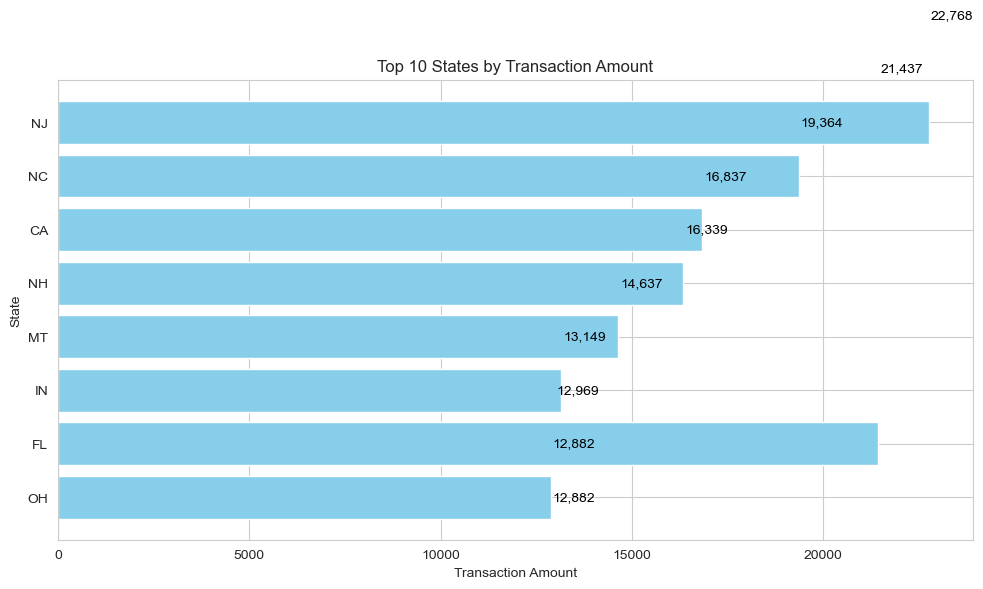

In [ ]:
# Aggregate transaction amounts by city
print("Aggregated transaction amounts by city:")
print(df.groupby('city')['amt'].sum().reset_index())
print("-" * 40)

# Aggregate transaction amounts by state
state_agg = df.groupby('state')['amt'].sum().reset_index()
print("Aggregated transaction amounts by state:")
print(df.groupby('state')['amt'].sum().reset_index())
print("-" * 40)


state_df = pd.DataFrame(df)

# Sort by transaction amount and select top 10 states
top_states = state_df.nlargest(10, 'amt').sort_values('amt', ascending=True)

# Plotting horizontal bar chart for top 10 states
plt.figure(figsize=(10, 6))
plt.barh(top_states['state'], top_states['amt'], color='skyblue')
plt.title('Top 10 States by Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('State')
# Add data labels to the bars
# Add data labels to the bars
for index, value in enumerate(top_states['amt']):
    plt.text(value + 50, index, f'{int(value):,}', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [ ]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

Class 0: (553574, 24)
Class 1: (2145, 24)
Undersampled dataset shape: (4290, 24)
is_fraud
0    2145
1    2145
Name: count, dtype: int64


<Axes: title={'center': 'count(target)'}, xlabel='is_fraud'>

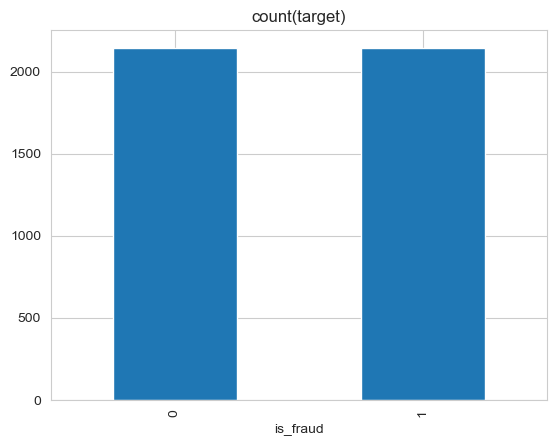

In [ ]:
class_count_0, class_count_1 = df['is_fraud'].value_counts()

# Separate the DataFrame into two classes
class_0 = df[df['is_fraud'] == 0]
class_1 = df[df['is_fraud'] == 1]

# Print the shape of each class
print('Class 0:', class_0.shape)
print('Class 1:', class_1.shape)

# Undersample the majority class
class_0_under = class_0.sample(class_count_1)

# Combine the undersampled majority class with the minority class
df_under = pd.concat([class_0_under, class_1], axis=0)

print('Undersampled dataset shape:', df_under.shape)
print(df_under['is_fraud'].value_counts())
df_under['is_fraud'].value_counts().plot(kind ='bar', title='count(target)')

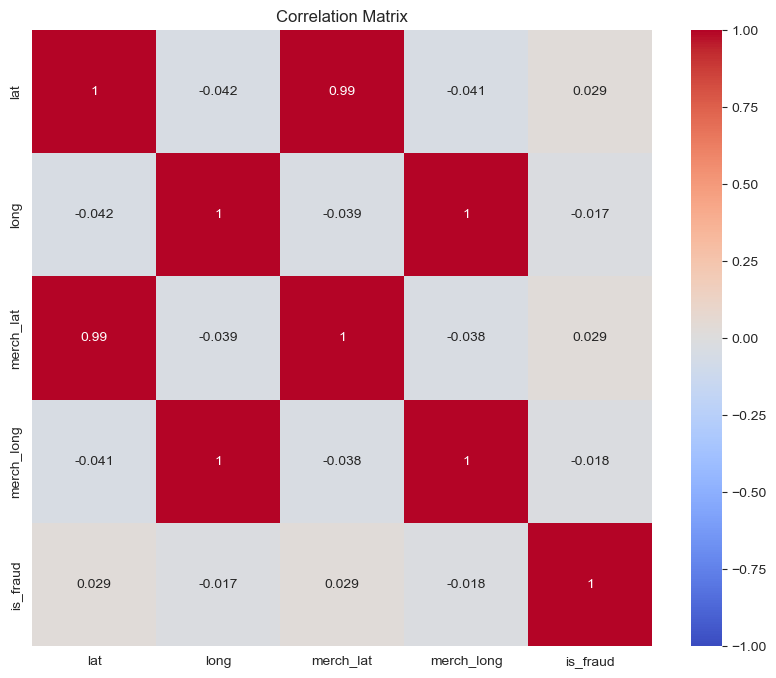

In [ ]:
## EDA #Distribute the class - to check corrb/w mechant and cusomter distnace
df_under[('is_fraud')].value_counts()

# Select only numeric columns for correlation calculation
numeric_columns = ['lat', 'long','merch_lat', 'merch_long', 'is_fraud']
df_numeric = df_under[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_under

# Undersampling (Doan)

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df[df['is_fraud'] == 0]
df_minority = df[df['is_fraud'] == 1]

NameError: name 'df' is not defined

In [ ]:
# Downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority), # to match minority class
                                   random_state=42) # reproducible results

# Combine minority class with downsampled majority class
df_undersampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_undersampled['is_fraud'].value_counts())

is_fraud
0    2145
1    2145
Name: count, dtype: int64


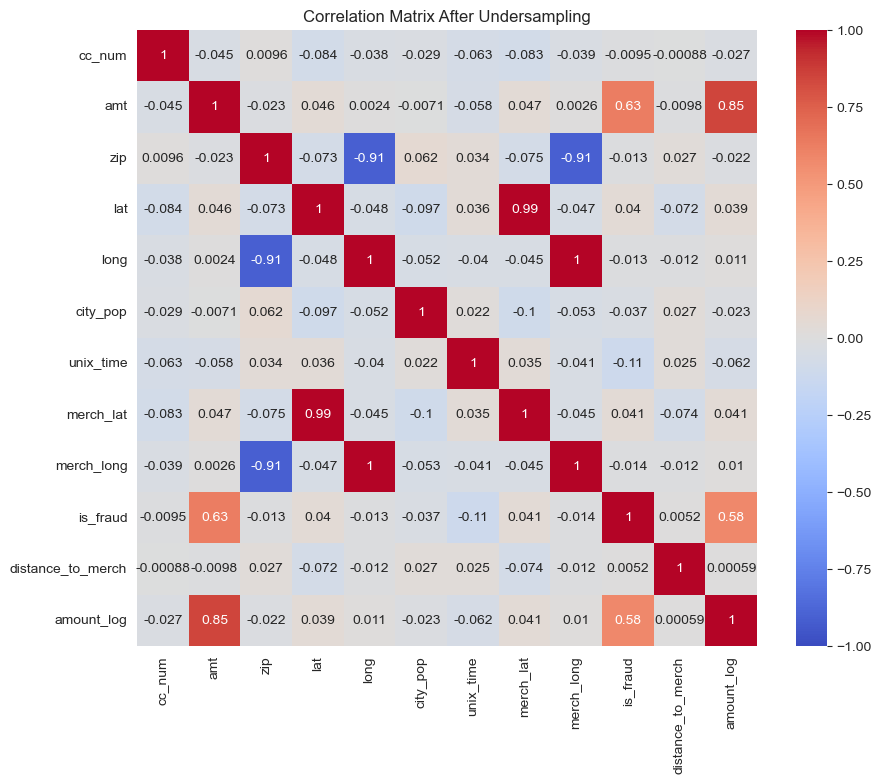

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Assuming df_undersampled is your DataFrame
# Ensure 'amt' is numeric and convert if necessary
df_undersampled['amt'] = pd.to_numeric(df_undersampled['amt'], errors='coerce')

# Create new feature based on transaction amounts
df_undersampled['amount_log'] = np.log(df_undersampled['amt'] + 1)

# Exclude non-numeric columns like 'trans_date' from correlation matrix
numeric_columns = df_undersampled.select_dtypes(include=[np.number]).columns
df_numeric = df_undersampled[numeric_columns]

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix After Undersampling')
plt.show()

# Positive Correlations
- amt and amount_log: 0.85
- merch_lat and merch_long: 0.91
- trans_24h_count and trans_24h_amount_avg: 0.75
- avg_trans_amount and total_trans_amount: 0.30
- amt and trans_24h_amount_avg: 0.73
- amt and total_trans_amount: 0.23
- total_trans_amount and amount_log: 0.12
- trans_month and trans_year: 0.19
- Negative Correlations

# Negative Correlations
- merch_long and merch_lat: -0.91
- cc_num and merch_lat: -0.10
- cc_num and amount_log: -0.01
- amt and unix_time: -0.04
- is_fraud and trans_month: -0.02
- transaction_day and amount_log: -0.02
- transaction_day and unix_time: -0.04

# Additional Notes
- is_fraud has a moderate positive correlation with amt (0.26) and amount_log (0.57).
trans_24h_amount_avg has a moderate positive correlation with amt (0.73) and a moderate positive correlation with amount_log (0.64).

# Positive Correlations with target
- amt: 0.26
- trans_24h_count: 0.75
- trans_24h_amount_avg: 0.26
- amount_log: 0.57

# Negative Correlations with target
- transaction_day: -0.03
- transaction_month: -0.02
- total_trans_amount: -0.30
- zip: -0.07
- merch_lat: -0.06
- city_pop: -0.02

In [ ]:
# List of features to plot
features = ['amt', 'trans_24h_count', 'trans_24h_amount_avg', 'amount_log', 'total_trans_amount']

# Feature Engineering 

In [ ]:
df_undersampled.info()

NameError: name 'df_undersampled' is not defined

In [ ]:
# Drop unnecessary columns that are not needed for modeling
# df_undersampled.drop([ 'dob', 'trans_time', 'trans_date', ], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode remaining categorical variables if any are left
# For example, using LabelEncoder
encoder = LabelEncoder()
for col in df_undersampled.select_dtypes(include=['object', 'category']):
    df_undersampled[col] = encoder.fit_transform(df_undersampled[col])

In [ ]:
# Split into features and target variable
X = df_undersampled.drop('is_fraud', axis=1)
y = df_undersampled['is_fraud']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Random Forest classifier for feature importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Feature importance scores
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

In [ ]:
# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

In [ ]:
# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:")
print(feature_importance_df)

NameError: name 'feature_importance_df' is not defined

In [ ]:
# Select top features based on importance score threshold or select manually
# For example, selecting top 10 features
selected_features = feature_importance_df.head(10)['Feature'].tolist()

# Filter X_train and X_test to include only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
model_selected.fit(X_train_selected, y_train)

NameError: name 'feature_importance_df' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Random Forest classifier for feature importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


# Predictions and evaluation
y_pred = model_selected.predict(X_test_selected)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Random Forest classifier for feature importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

NameError: name 'model_selected' is not defined

In [ ]:
# Random Forest classifier for feature importance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)